# Class Single Recording Code

Developing Code for Single Recordings
- Filtering
- Whole Trace Observations
- Epoch Extraction
- PSTHS

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from single_tdt_class import *
# from hab_dishab_extension import *

In [2]:
single_recording_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_7_24_Hab_DisHab_P2-240505-130502\good\nac\n1-240507-080133"
csv_base_path = r"C:\Users\alber\OneDrive\Documents\GitHub\PCLAB_Photometry\P2_Code\C1_Hab_Dishab\nac\n1-240507-080133.csv"

## Bout Data from CSV

In [3]:
tdt_data = tdt.read_block(single_recording_path)
# Assuming `tdt_data` is already loaded
tdt_data_obj = TDTData(tdt_data, single_recording_path)

tdt_data_obj.extract_manual_annotation_behaviors(csv_base_path)

# Remove specified time range
# tdt_data_obj.remove_time(start_time=780, end_time=921)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Cohort 1\Synapse\Tanks\5_7_24_Hab_DisHab_P2-240505-130502\good\nac\n1-240507-080133\Notes.txt
read from t=0s to t=1573.39s


## Plot Raw Trace

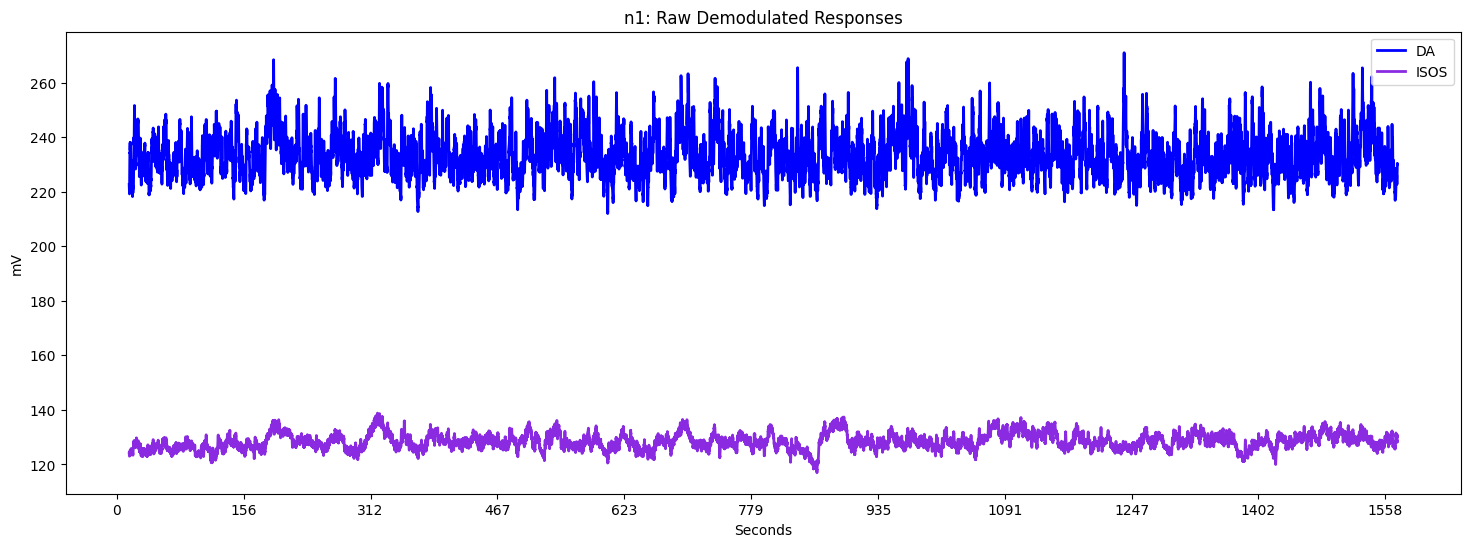

In [4]:
# Remove initial LED artifact
tdt_data_obj.remove_initial_LED_artifact(t=15)

# tdt_data_obj.smooth_signal()
tdt_data_obj.verify_signal()
# Plot raw trace
tdt_data_obj.plot('raw')

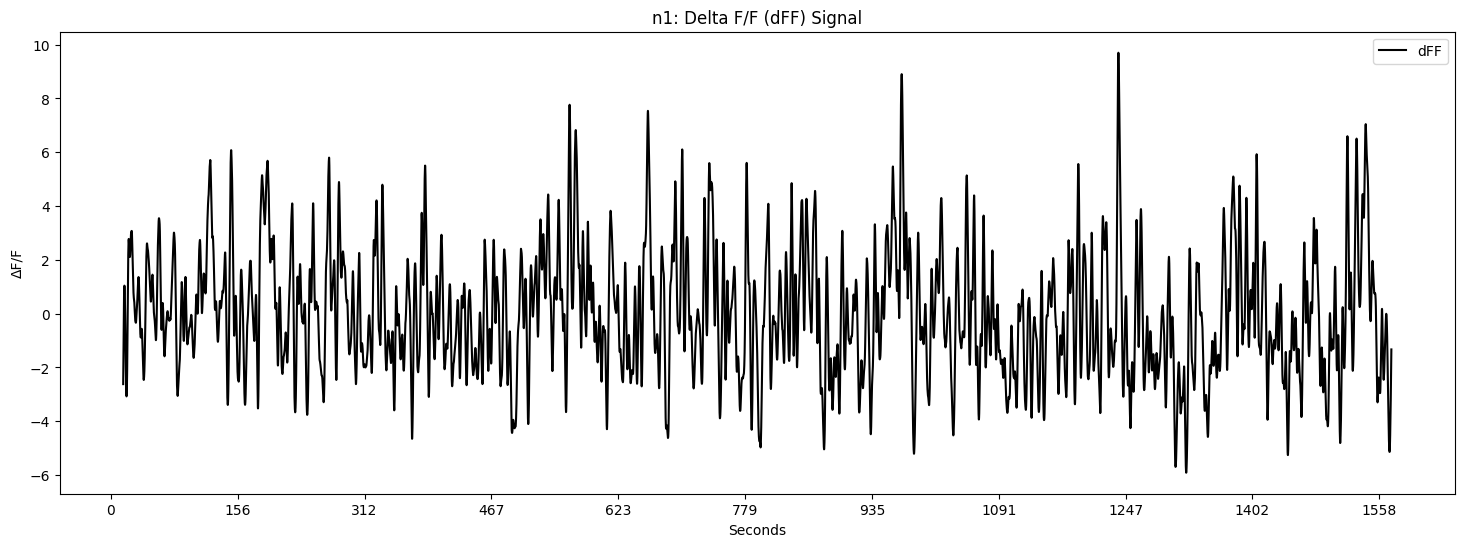

In [5]:
# Downsample the data
tdt_data_obj.downsample_data(N = 20)


# Compute dFF
tdt_data_obj.compute_dff()
tdt_data_obj.plot('dFF')

In [6]:
tdt_data_obj.compute_zscore()

In [7]:
tdt_data_obj.print_behaviors()

Behavior names in self.behaviors:
Investigation
Approach


In [8]:
tdt_data_obj.combine_consecutive_behaviors(behavior_name='Investigation', bout_time_threshold=5, min_occurrences=1)

Combining events at indices 1 and 2
Combining events at indices 1 and 3
Combining events at indices 4 and 5
Combining events at indices 8 and 9
Combining events at indices 10 and 11
Combining events at indices 18 and 19
Combining events at indices 20 and 21
Combining events at indices 20 and 22
Combining events at indices 24 and 25
Combining events at indices 24 and 26
Combining events at indices 34 and 35


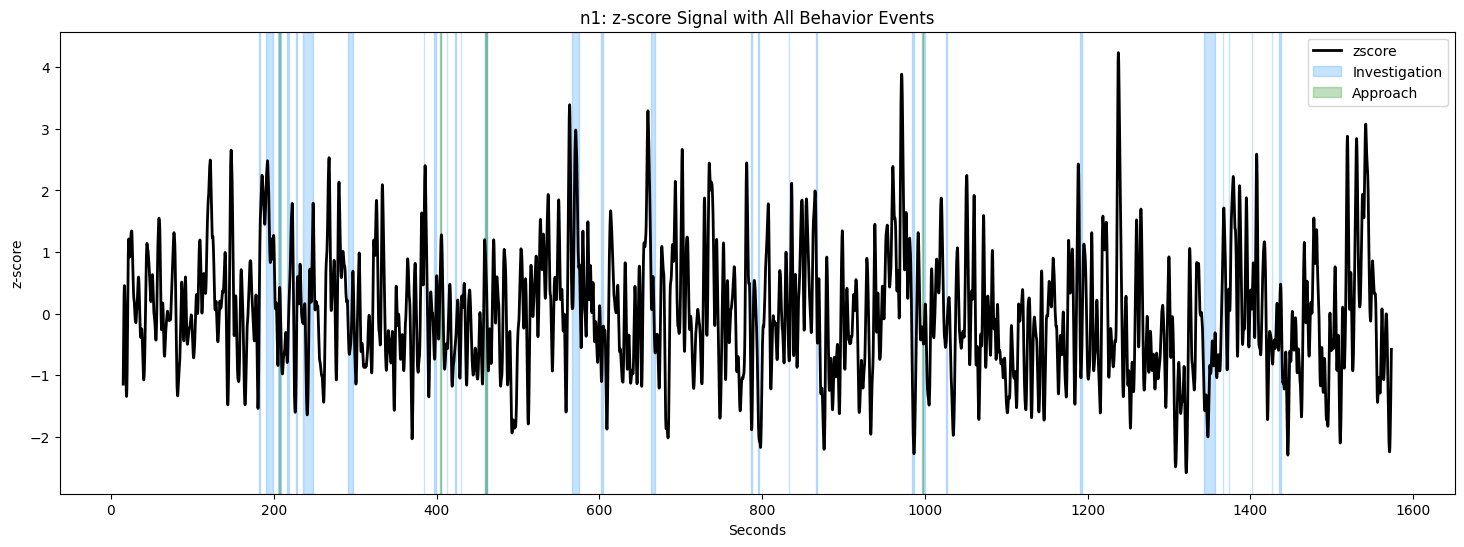

In [9]:
tdt_data_obj.plot_behavior_event(behavior_name='all', plot_type='zscore')

## Mean DA during first of each behavior

In [10]:
tdt_data_obj.extract_intruder_bouts(csv_base_path)

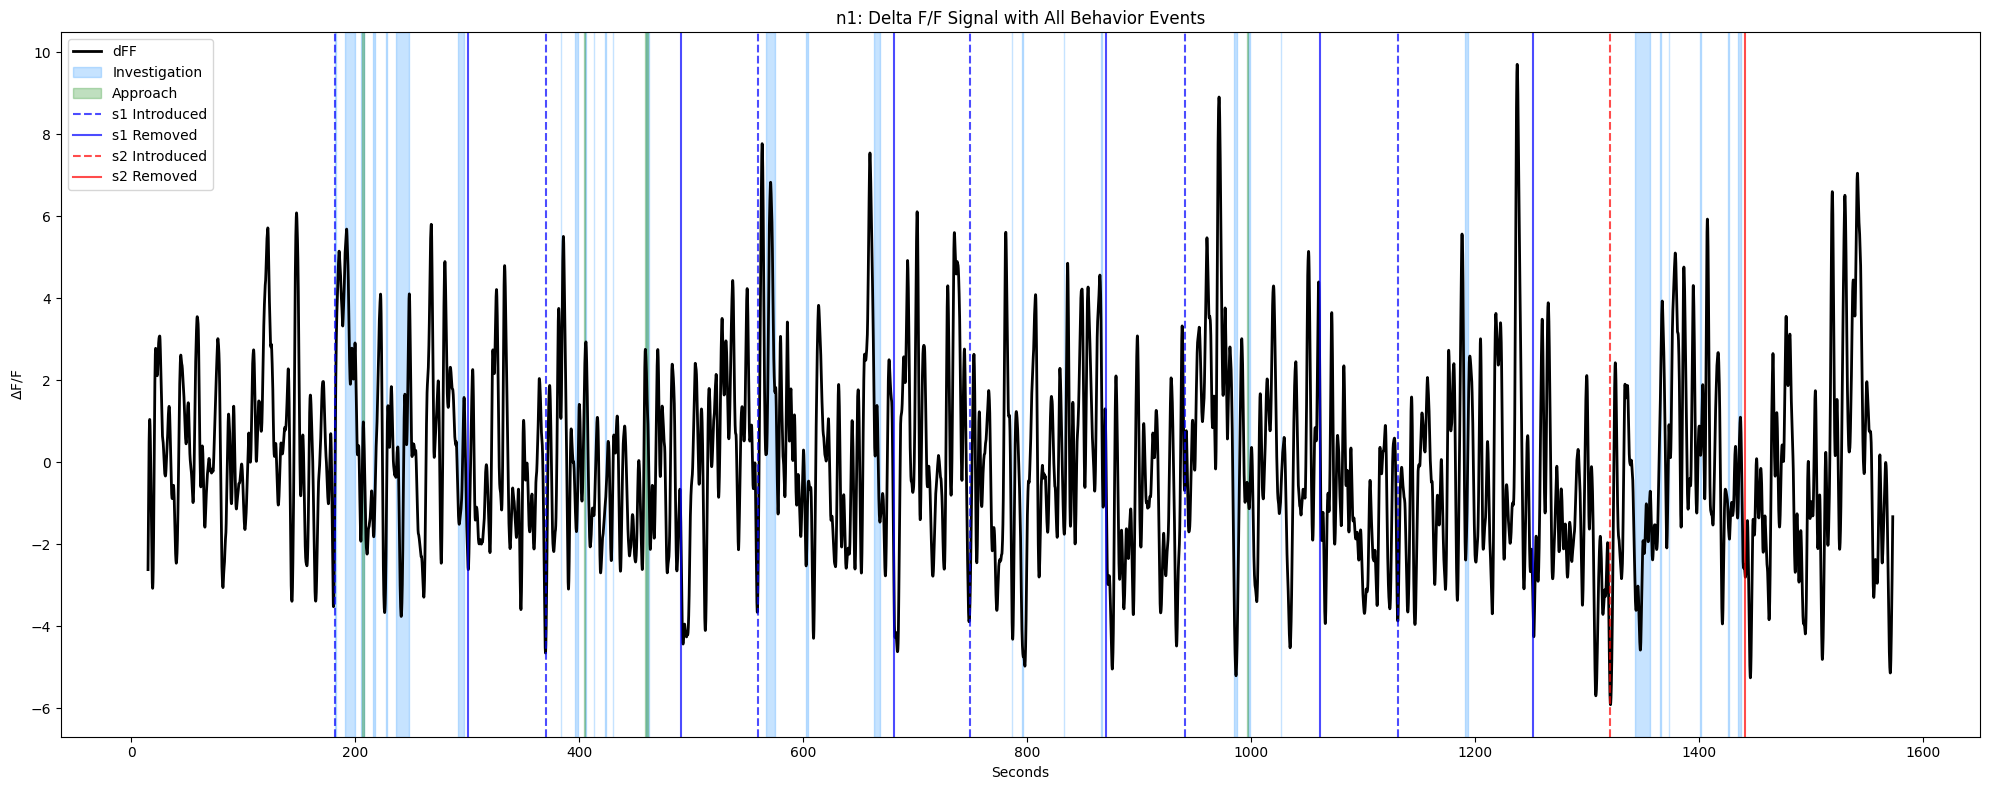

In [11]:
tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all')

In [12]:
tdt_data_obj.find_behavior_events_in_bout()

In [14]:
tdt_data_obj.bout_dict.keys()

dict_keys(['Bout_s1_1', 'Bout_s1_2', 'Bout_s1_3', 'Bout_s1_4', 'Bout_s1_5', 'Bout_s1_6', 'Bout_s2_1'])